## 共轭梯度法

这里我们先给出向量共轭的定义. 如果两个n维非零向量$d_{i}, d_{j}$和一个正定矩阵$Q$, 满足
$$d_{i}^{T}Qd_{j} = 0$$
所以对于一个非零向量组${d_{0}, d_{1}, ..., d_{n-1}}$对于任意两个不同的向量都有
$$d_{i}^{T}Qd_{j} = 0$$
我们称为这个向量组为共轭的. 实际上即为向量正交的推广.

例如我们给定一个正定矩阵$Q$, 那么如何求出关于它的共轭向量组呢? 这里我们可以采用施密特正交化的方法.

给定一组线性无关的向量组, $P = [p_{0},p_{1}, ..., p_{n-1}]$, 使用如下的方法可以构造出一组关于$Q$共轭的向量组$D=[d_{0}, d_{1}, ...,d_{n-1}]$

$$d_{0} = p_{0}$$
$$d_{k+1} = p_{k+1} - \sum_{i=0}^{k}\frac{p_{k+1}^{T}Qd_{i}}{d_{i}^{T}Qd_{i}}d_{i}$$

使用数学归纳法易证上述定理成立.

对于一个二次型问题 $f = \frac{1}{2}x^{T}Qx - x^{T}b$, 求解其最小值, 我们可以假定取得最小值的自变量为$x_{*}$, 起始点为$x_{0}$ , 那么我们可以将迭代过程写成
$$x_{k+1} = x_{0} + \sum_{i=0}^{k}\alpha_{i}d_{i}$$
其中$d_{i}$为第$i$个共轭的向量, $x_{k+1}$是第$k$次迭代的结果. 这里$\alpha_{i}$为步长.
$$\alpha_{k} = arg\min_{\alpha} f(x_{k}-\alpha d_{i})$$
所以可以得到
$$\alpha_{k} = -\frac{d_{k}^{T}g_{k}}{d_{k}^{T}Qd_{k}}$$
这里$g_{k} = \nabla f(x_{k})$


因此我们可以得到一个迭代公式:

1. 构造好共轭的向量组, 并取起始点$x_{0}$
2. $x_{k+1} = x_{k} + \alpha_{k} d_{k}$
3. 判断是否达到误差容忍的范围内, 即可跳出循环.

下面以 $f = (x-y)^{2} + (x-3)^{2} + (y-3)^{2}$ 为例, 来寻找它的最小值

In [1]:
import numpy as np
def conjmethod(Q, diff1, x):
    n = np.size(Q,axis=0)
    p = np.eye(n)
    d = np.zeros((n,n))
    d[0] = p[0]
    for ii in range(1, n):
        tmp = 0
        for k in range(ii):
            tmp1 = np.dot(np.dot(p[ii].reshape((1,n)), Q), d[k].reshape((n,1)))
            tmp2 = np.dot(np.dot(d[k].reshape((1,n)), Q), d[k].reshape((n,1)))
            tmp += tmp1/tmp2 * d[k].reshape((n,1))
        d[ii] = p[ii] - tmp.reshape((n,))
    path = [x]
    for ii in range(n):
        g = np.dot(Q, x) - b
        a1 = np.dot(d[ii].reshape((1,n)), np.array(g).reshape((n,1)))
        a2 = np.dot(np.dot(d[ii].reshape((1,n)), Q),d[ii].reshape((n,1)))
        a1,a2 = np.squeeze(a1), np.squeeze(a2)
        x = x - a1/a2*d[ii].reshape((n,1))
        path.append(x)
    return x, path

In [2]:
f = lambda x,y:2*x**2+2*y**2-2*x*y -6*x - 6*y + 18
b = np.array([[6], [6]])
x = np.array([[0], [0]])
Q = np.array([[4, -2], [-2, 4]])
x, path = conjmethod(Q, b, x)
print(x)

[[3.]
 [3.]]


In [3]:
k = 0
for point in path: 
    print(k,':', point.reshape((1,2)))
    k += 1

0 : [[0 0]]
1 : [[1.5 0. ]]
2 : [[3. 3.]]


In [4]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-8, 8, 0.25)
Y = np.arange(-8, 8, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
plt.show()

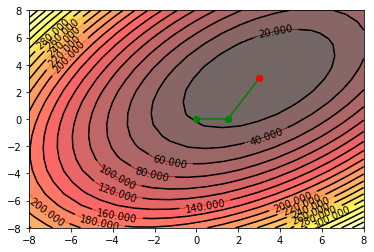

In [5]:
# 定义等高线图的横纵坐标x，y
#从左边取值为从 -3 到 3 ，各取5个点，一共取 5*5 = 25 个点

xx = np.linspace(-8, 8, 20)
yy = np.linspace(-8, 8, 20)
# 将原始数据变成网格数据
X, Y = np.meshgrid(xx, yy)

Height = f(X, Y)
# 填充颜色
plt.contourf(X, Y, Height, 20, alpha = 0.6, cmap = plt.cm.hot)
# 绘制等高线
C = plt.contour(X, Y, Height, 20, colors = 'black')
# 显示各等高线的数据标签
plt.clabel(C, inline = True, fontsize = 10)

for ii in range(len(path)-1):
    plt.plot([path[ii][0], path[ii+1][0]], [path[ii][1], path[ii+1][1]], 'go-')
plt.plot(x[0], x[1], 'ro')
plt.show()

## comment

可以看到, 对于二次型函数只需要$n$次迭代就可以到达最小值($n$为$Q$的维度), 相比最速下降法的迭代, 共轭梯度的收敛速度要快很多, 而且不会由于等高线被拉伸的过于严重导致zigzag现象的很严重, 导致收敛速度极慢. 这里简单提一下收敛快速的原因, 实际上在共轭方向算法中:

$$g_{k+1}^{T}d_{i} = 0, i\leq k $$

也即为每一次的迭代的新的点的梯度都与之前的路径正交. 这就保证了之前所有的迭代对当前点的

但是找到共轭的向量却不是一个简单的事情, 这里我们使用斯密特正交化的方式来产生共轭的向量组并不是很简单的, 而是需要实现生成好, 当然对于二次型函数会比较方便, 由于它的Hessian矩阵并不会发生变化, 对于非线性函数就不一定了, 所以实时的产生共轭的向量将会是很方便快捷的算法, 也就是下面要讲到的共轭梯度算法.

In [6]:
def conjgrad(Q, b, x):
    path = [x]
    n = np.size(Q,axis=0)
    r = b - np.dot(Q, x)
    p = r.reshape((n,1))
    rsold = np.dot(r.T, r)
    for i in range(n):
        Qp = np.dot(Q, p)
        alph = np.squeeze(rsold / np.dot(p.T, Qp))
        x = x + alph*p
        path.append(x)
        r = r - np.dot(alph, Qp).reshape((n, 1))
        rsnew = np.dot(r.T,r)
        if np.sqrt(rsnew)<1e-4:
            break
        p = r + np.dot((rsnew/rsold), p)
        rsold = rsnew 
    return x, path

In [7]:
f = lambda x,y:2*x**2+2*y**2-2*x*y -6*x - 6*y + 18
b = np.array([[6], [6]])
x = np.array([[0], [0]])
Q = np.array([[4, -2], [-2, 4]])
x, path = conjgrad(Q, b, x)
print(x)

[[3.]
 [3.]]


In [8]:
k = 0
for point in path: 
    print(k,':', point.reshape((1,2)))
    k += 1

0 : [[0 0]]
1 : [[3. 3.]]


可以看到, 由于第一步使用了沿着梯度下降的策略, 而不是随便选择的方向, 与上面的共轭方向相比可以少迭代一次.